In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


#classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB


# Performance Metric
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef,confusion_matrix,classification_report

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
attrition = pd.read_csv('HR-Employee-Attrition.csv')
print(attrition.shape)
print(attrition.size)
display(attrition.head())

(1470, 35)
51450


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. Exploratory Data Analysis¶

In [3]:
display(attrition.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
attrition.get_dtype_counts()

int64     26
object     9
dtype: int64

In [5]:
attrition.Attrition.unique()

array(['Yes', 'No'], dtype=object)

### Data Quality check

In [6]:
# checking the null values. 
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

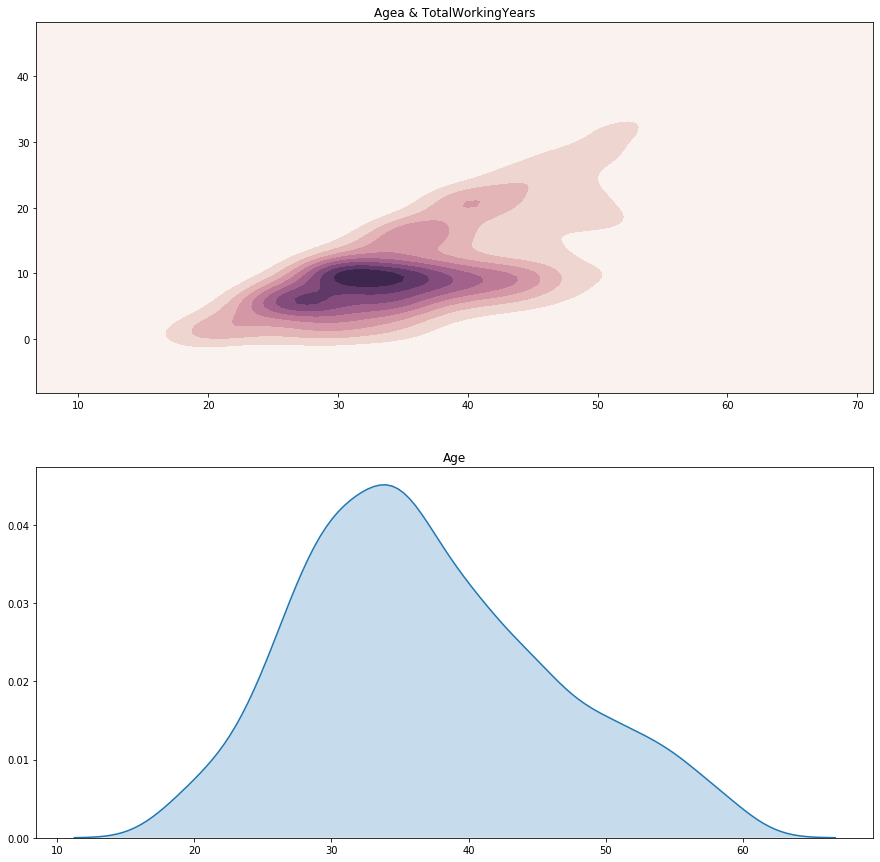

In [7]:
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
plt.title('Agea & TotalWorkingYears')
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5)


plt.subplot(2,1,2)
# Generate and plot
plt.title('Age')
sns.kdeplot(x,shade=True)


In [8]:
# Define a dictionary for the target mapping
# Method 1attrition.Attrition.replace({'Yes':1, 'No':0})
target_map = {'Yes':1, 'No':0}
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

## Correlation of Features

the next tool in a data explorer's arsenal is that of a correlation matrix. Pearson Correlation

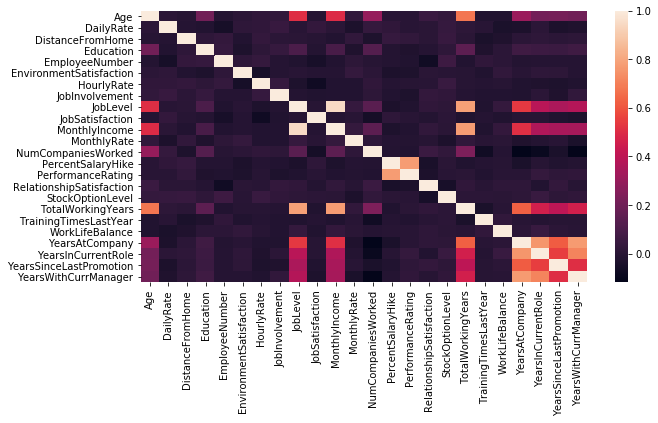

In [9]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']

plt.figure(figsize=(10,5))
sns.heatmap(attrition[numerical].corr())

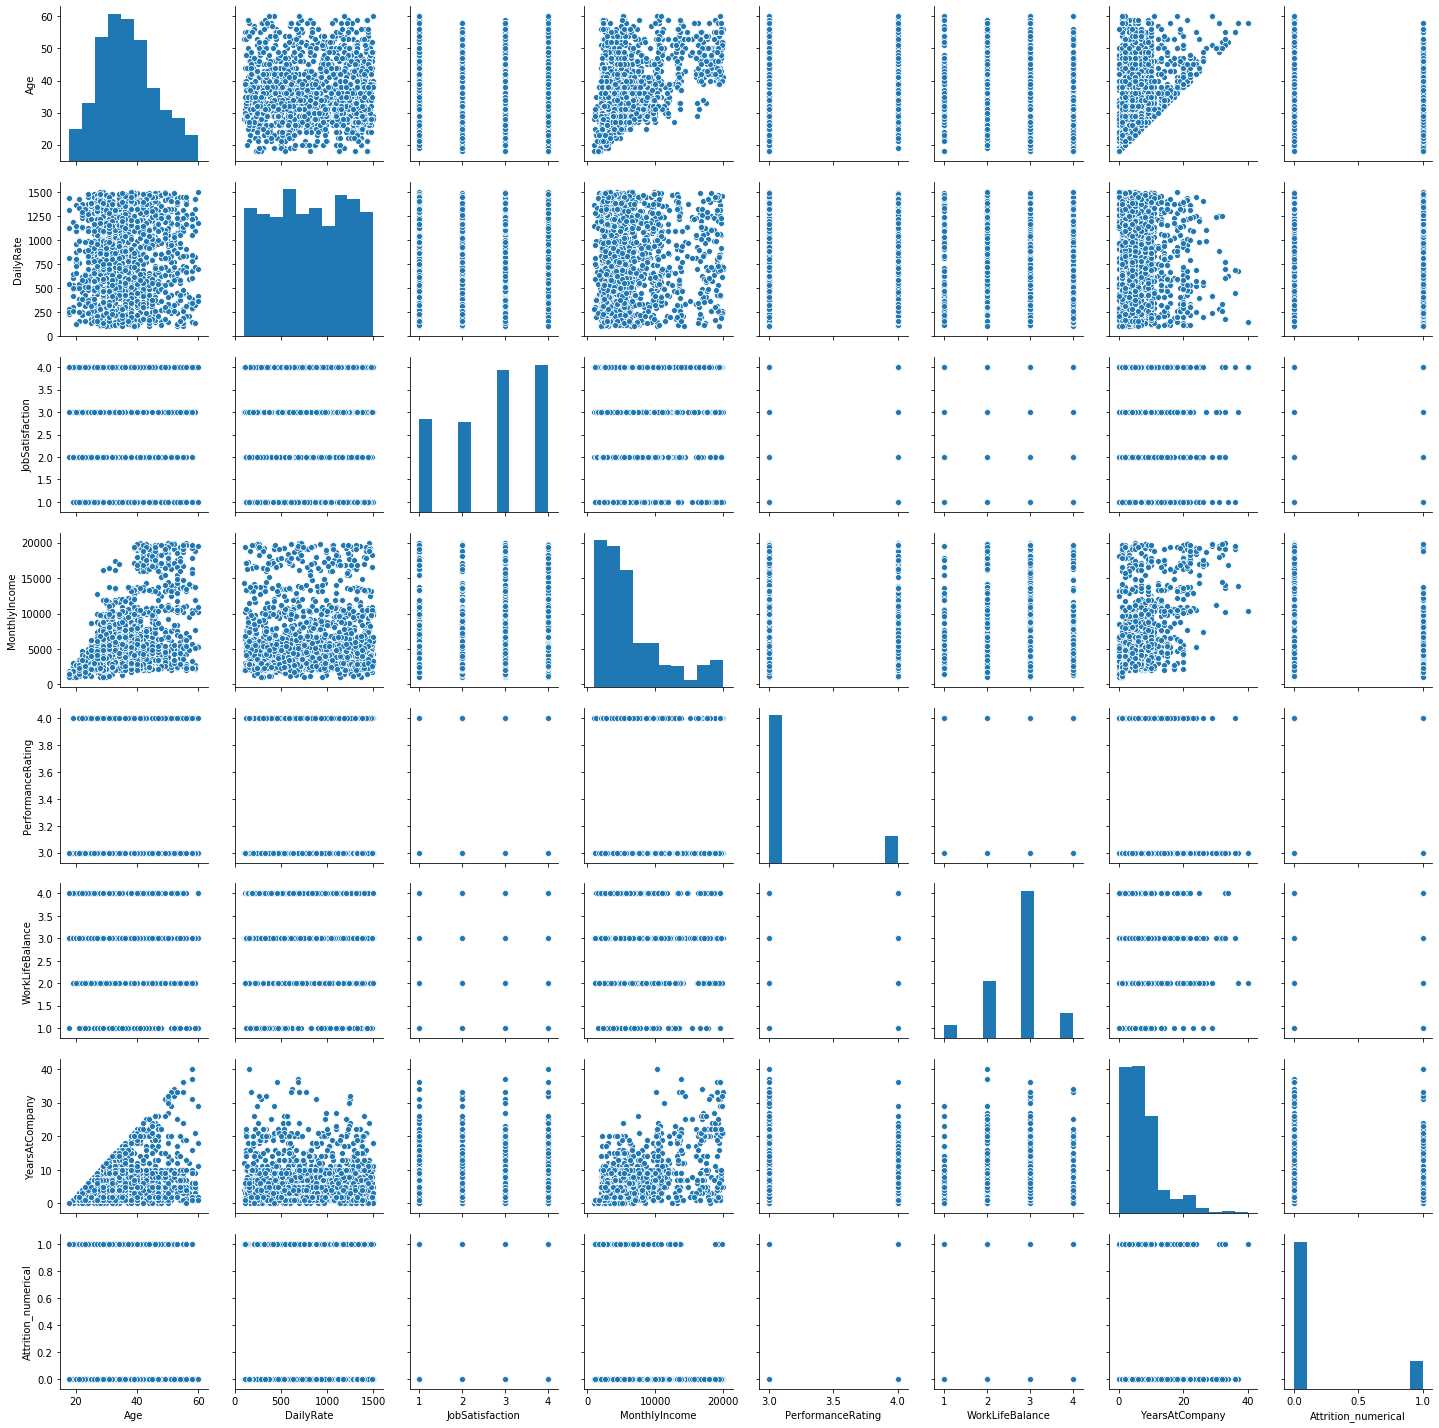

In [10]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']
sns.pairplot(attrition[numerical])

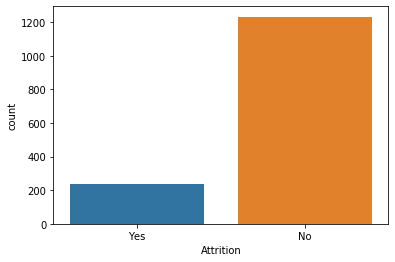

In [11]:
# Checking for imbalance wiht countplot
sns.countplot(attrition.Attrition)

# Label Encoder

In [12]:
le = LabelEncoder()
le.fit(attrition.Attrition.values)
le.classes_

#checking the Values using the transform methond
le.transform(['Yes', 'No']) 

array([1, 0], dtype=int64)

In [13]:
demo = le.transform(attrition.Attrition)
demo[0:5]

array([1, 0, 1, 0, 0])

In [14]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_numerical'],
      dtype='object')

In [15]:
x = attrition.drop(['Attrition','Attrition_numerical'],axis=1)
y = pd.DataFrame(attrition["Attrition"].apply(lambda x: target_map[x]))

In [16]:
x = pd.get_dummies(x)
x.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0


In [17]:
#Lets Create the Balanced target variable using the smote functon:

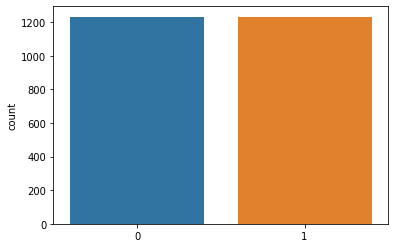

In [18]:
## Using Smote to balance the target variable
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x,y)
sns.countplot(smote_target)

x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(smote_train,smote_target, train_size=.8,random_state=0)

In [19]:
#The balanced data is now assigned to variable smote_train,smote_target.

print(x.shape, smote_train.shape)

print(y.shape, smote_target.shape)


(1470, 55) (2466, 55)
(1470, 1) (2466,)


## 3. Implementing Machine Learning Models¶

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#de6114;"> i) Logistic Regression 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.8,random_state=0)
lr = LogisticRegression(penalty='l1',random_state=2).fit(x_train,y_train)
display(lr.score(x_train,y_train), lr.score(x_test,y_test))

display(cohen_kappa_score(y_test,lr.predict(x_test)))
# checking the cohen kappa score if the class is imbalanced

0.8979591836734694

0.8775510204081632

0.47317073170731705

In [21]:
lr.predict_proba(x_test.iloc[:1,:])

array([[0.9334738, 0.0665262]])

### Overfitting and Regularization

In [22]:
# Using L2 Penalty
lr = LogisticRegression(penalty='l2',random_state=2,C=0.01).fit(x_train,y_train)
print(lr.score(x_train,y_train), lr.score(x_test,y_test))
print(cohen_kappa_score(y_test,lr.predict(x_test)))

0.8571428571428571 0.8435374149659864
0.12101910828025475


In [23]:
# Using L2 Penalty on Balanced target variable
lr = LogisticRegression(penalty='l2',random_state=2).fit(x_train,y_train)
print(lr.score(x_train_smote,y_train_smote), lr.score(x_test_smote,y_test_smote))
print(cohen_kappa_score(y_test_smote,lr.predict(x_test_smote)))

0.77079107505071 0.7753036437246964
0.5608572389601654


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#de6114;">2) DecisionTree

In [24]:
# lets create the basic decision tree model. 

#x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.8,random_state=0
dt = DecisionTreeClassifier(random_state=2).fit(x_train,y_train)
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

1.0
0.7687074829931972


In [25]:
# Parameter tuning. 
dt1 = DecisionTreeClassifier(max_depth=4,random_state=2).fit(x_train,y_train)
print(dt1.score(x_train,y_train))
print(dt1.score(x_test,y_test))

0.8758503401360545
0.8299319727891157


In [26]:
# Using balanced target Variables
dt = DecisionTreeClassifier().fit(x_train_smote,y_train_smote)
print(dt.score(x_train_smote,y_train_smote))
print(dt.score(x_test_smote,y_test_smote))

1.0
0.8380566801619433


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#de6114;">3) Random Forest - Ensemble Technique

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.8,random_state=0)
rfc = RandomForestClassifier(random_state=2).fit(x_train,y_train)
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.9778911564625851
0.8435374149659864


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.8,random_state=0)
rfc = RandomForestClassifier(n_estimators=20,random_state=2).fit(x_train,y_train) # N_estimator = Number of trees we want build forest on
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.9948979591836735
0.8605442176870748


In [29]:
# Using balanced target Variables
rfc = RandomForestClassifier().fit(x_train_smote,y_train_smote)
print(rfc.score(x_train_smote,y_train_smote))
print(rfc.score(x_test_smote,y_test_smote))

0.9964503042596349
0.9068825910931174


In [30]:
#With parameter Tuning
seed=0
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)

rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*80)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.8367346938775511
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       0.67      0.04      0.08        49

    accuracy                           0.84       294
   macro avg       0.75      0.52      0.49       294
weighted avg       0.81      0.84      0.77       294



It would be more informative to balance out the precision and recall scores as show in the classification report outputs. Where it falls down to the business considerations over whether one should prioritise for a metric over the other - i.e. your Precision vs Recall.

In [31]:
# Performing on the Balanced Dataset
rf_s = RandomForestClassifier(**rf_params)

rf_s.fit(x_train_smote, y_train_smote)
rf_predictions = rf_s.predict(x_test_smote)
print("Accuracy score: {}".format(accuracy_score(y_test_smote, rf_predictions)))
print("="*80)
print(classification_report(y_test_smote, rf_predictions))

Accuracy score: 0.8846153846153846
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       231
           1       0.93      0.85      0.89       263

    accuracy                           0.88       494
   macro avg       0.89      0.89      0.88       494
weighted avg       0.89      0.88      0.88       494



<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;">K-nearest neighbors – a lazy learning algorithm 

In [33]:
knn = KNeighborsClassifier().fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.8511904761904762
0.7993197278911565


In [34]:
#for metric Euclidean distance measure, i
#it is also important to standardize the data so that each feature contributes equally to the distance. 
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

knn = KNeighborsClassifier(metric='euclidean').fit(x_train_scaled,y_train)
print(knn.score(x_train_scaled,y_train))
print(knn.score(x_test_scaled,y_test))

0.8775510204081632
0.8401360544217688


# Support Vector Machine

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Selecting meaningful features 

##### L1 and L2 regularization as penalties against model complexity 

# Model Evaluation and hyper parameter tuning

In [35]:
#Combining transformers and estimators in a pipeline

x = attrition.drop(['Attrition','Attrition_numerical'],axis=1)
y = pd.DataFrame(attrition["Attrition"].apply(lambda x: target_map[x]))

In [36]:
from sklearn.pipeline import make_pipeline 
from sklearn.decomposition import PCA 
x = pd.get_dummies(x)
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=10), LogisticRegression(random_state=1))

#estimator object  is the Final element in the pipeline.  the last pipeline element has to be an estimator. 
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.8,random_state=2)
pipe_lr.fit(x_train,y_train)
print(pipe_lr.score(x_train,y_train))
print(pipe_lr.score(x_test,y_test))

                        
                        

0.8486394557823129
0.8503401360544217


# Using k-fold cross-validation to assess model performance 

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
scores = cross_val_score(estimator=pipe_lr, X=x_train, y=y_train, cv=10,n_jobs=1)
print(scores)
print('='*80)
print('CV Accuracy:',np.mean(scores))

[0.84745763 0.86440678 0.83898305 0.84745763 0.8559322  0.83050847
 0.84745763 0.84615385 0.84615385 0.85344828]
CV Accuracy: 0.847795935800027


<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">Ensemble Learning
    
The goal of ensemble methods is to combine different classifiers into a metaclassifier that has better generalization performance than each individual classifier alone.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;">Gradient Boosted Classifier

Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak Tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that you want minimised and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).

To set up a Gradient Boosting classifier is easy enough in Sklearn and it involves only a handful of lines of code. Again we first set up our classifier's parameters

Initialising Gradient Boosting Parameters

In general there are a handful of key parameter when setting up tree-based or gradient boosted models. These are always going to be the number of estimators, the maximum depth with which you want your model to be trained to, and the minimum samples per leaf

In [38]:
# Gradient Boosting Parameters
seed = 0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(x_train, y_train)
# Get our predictions
gb_predictions = gb.predict(x_test)

print('Accuracy Score:',accuracy_score(y_test, gb_predictions))
print('='*80)
print(classification_report(y_test, gb_predictions))

Accuracy Score: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       246
           1       0.75      0.31      0.44        48

    accuracy                           0.87       294
   macro avg       0.81      0.65      0.68       294
weighted avg       0.86      0.87      0.85       294



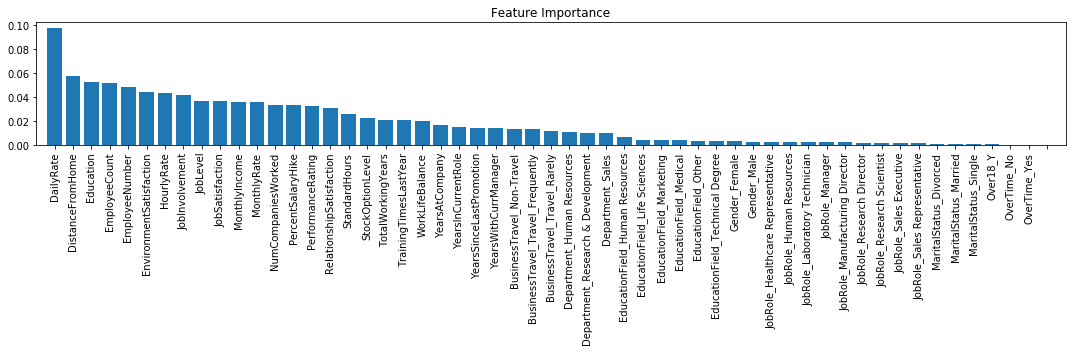

In [39]:
# Feature Importance using the Gradient Boosing
feat_labels = x.columns[1:] 

importances = gb.feature_importances_ 
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(15,5))
plt.title('Feature Importance') 
plt.bar(range(x_train.shape[1]),importances[indices],align='center')
plt.xticks(range(x_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

# Performance evaluation metrics 

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.8,random_state=0)
lr = LogisticRegression(penalty='l1',random_state=2).fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [41]:
#Confustion Matrix
confmat = confusion_matrix(y_test,y_pred)
confmat

array([[237,   8],
       [ 28,  21]], dtype=int64)

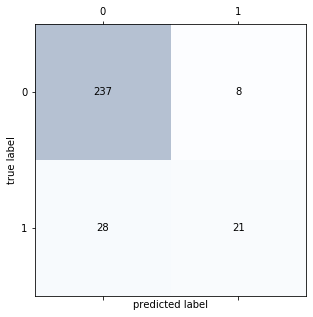

In [42]:
fig, ax = plt.subplots(figsize=(5,5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) 
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()